In [32]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib  inline

In [33]:
# Importing the dataset 
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Overview and Cleaning:

In [34]:
df.shape #to determine the dimensions of a DataFrame. It returns a tuple representing the number of rows and columns in the DataFrame.

(7043, 21)

In [35]:
#checking for data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.0,1.000,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,0.00,1.00,29.00,72.0,72.000,72.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,18.25,19.65,70.35,107.4,114.729,118.75,118.75


### Data Preprocessing
* Clean the dataset by handling missing values, encoding categorical variables, and scaling numerical features.
* Perform feature engineering to create new features that could influence churn, such as average transaction value, frequency of customer service interactions, and tenure with the company.

In [37]:
#Checking for Null values 
df.isna().sum().sum()

0

In [38]:
df.dropna(inplace = True)

In [39]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [40]:
#Obtaining Information about that datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
# Data Preparation
# The TotalCharges column is currently of type object. Convert it to a numeric type.
# Convert the Churn column to a binary numeric format for easier analysis.
# Convert TotalCharges to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Convert Churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

### Feature Engineering 
* Feature engineering involves creating new features from the existing data that could provide additional insights or to improve the performance of the machine learning models.
* We shall create new features such as Average Transaction Value, Frequency of Customer Service Interactions, and Tenure with the Company: that could influence customer churn:


In [42]:
 # Calculate the average transaction value
df['AverageTransactionValue'] = df['TotalCharges'].astype(float) / (df['tenure'] + 1)

# Frequency of Customer Service Interactions
# We can infer the frequency of customer service interactions based on the TechSupport, OnlineSecurity, and DeviceProtection columns. 
# We shall Assign a value to each service interaction (e.g., Yes = 1, No = 0). and then Sum the values for each customer to get the total frequency of interactions.
# Define a function to calculate interaction frequency
def calculate_interaction_frequency(row):
    return sum([row['TechSupport'] == 'Yes', row['OnlineSecurity'] == 'Yes', row['DeviceProtection'] == 'Yes'])

# Apply the function to each row to create a new column for interaction frequency
df['InteractionFrequency'] = df.apply(calculate_interaction_frequency, axis=1)

# Create tenure group with specified bins and labels
bins = [0, 12, 24, 36, 48, 60, 72, 84, 96, 120]
labels = ['0-1Y', '1-2Y', '2-3Y', '3-4Y', '4-5Y', '5-6Y', '6-7Y', '7-8Y', '8-10Y']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)


In [43]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageTransactionValue,InteractionFrequency,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,14.925000,0,0-1Y
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,53.985714,2,2-3Y
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,36.050000,1,0-1Y
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.016304,3,3-4Y
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,50.550000,0,0-1Y


### Exploratory Data Analysis (EDA):
* Analyze the data to identify key factors contributing to churn.
* Use visualization techniques (e.g., histograms, heatmaps, boxplots) to explore the relationship between different features and customer churn.
Segment customers based on behavior, demographics, or engagement levels to better understand the drivers of churn.

c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


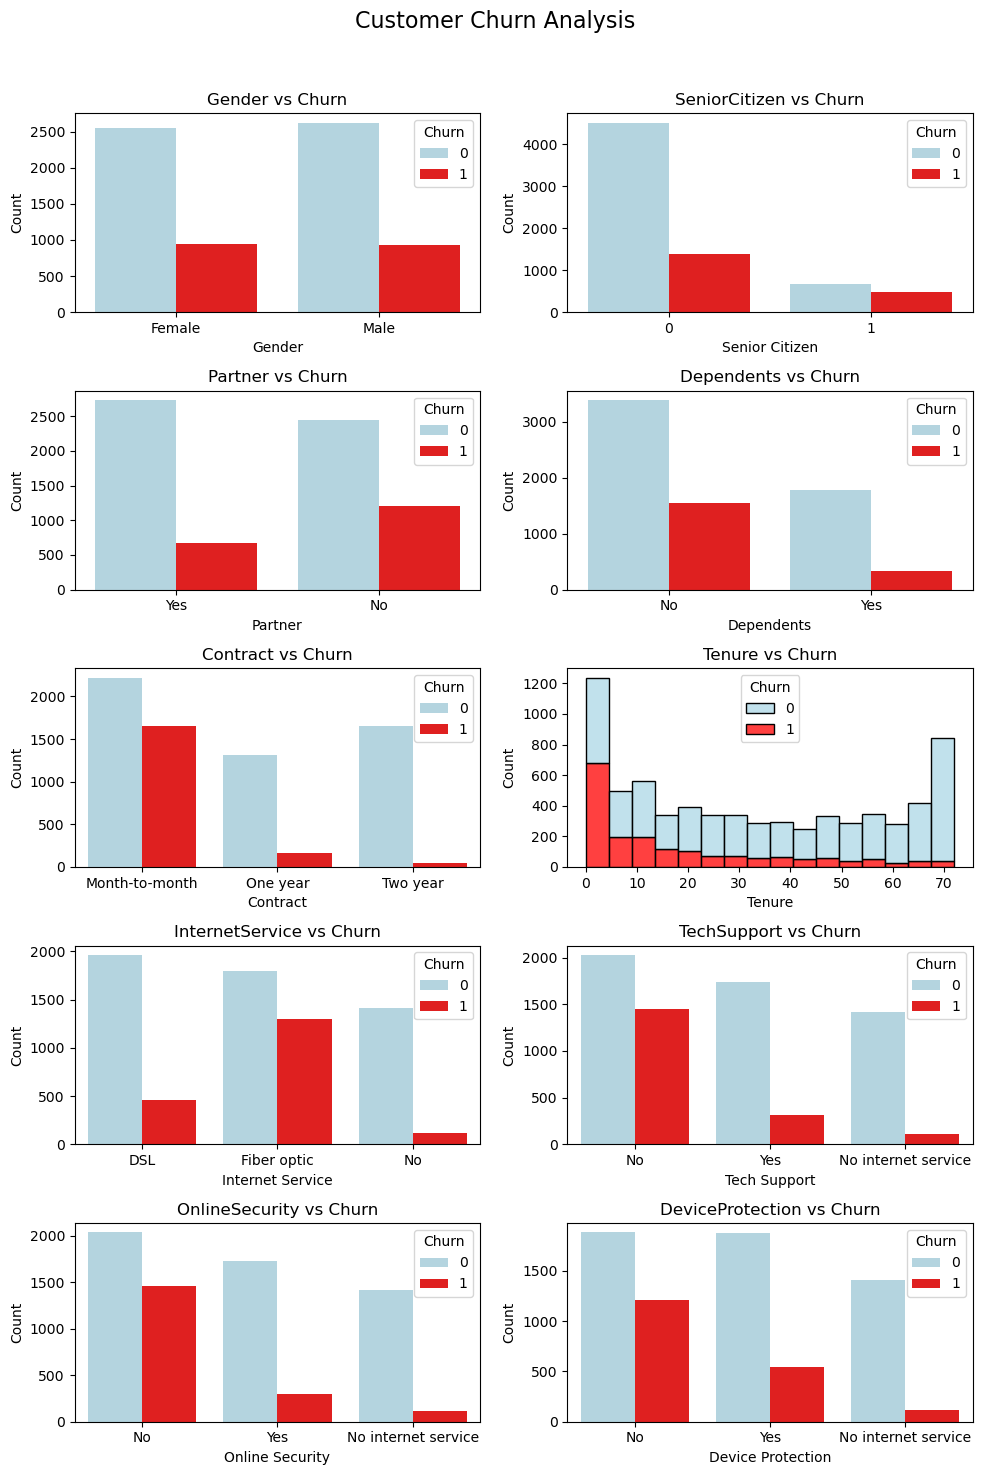

In [44]:
# Define a custom color palette with string keys
custom_palette = {'0': 'lightblue', '1': 'red'}

# Convert the 'Churn' column to string type
df['Churn'] = df['Churn'].astype(str)

# Create an aggregated figure with all the plots
fig, axes = plt.subplots(5, 2, figsize=(10, 15))  

# Gender vs Churn
sns.countplot(x='gender', hue='Churn', data=df, palette=custom_palette, ax=axes[0, 0])
axes[0, 0].set_title('Gender vs Churn')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

# SeniorCitizen vs Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette=custom_palette, ax=axes[0, 1])
axes[0, 1].set_title('SeniorCitizen vs Churn')
axes[0, 1].set_xlabel('Senior Citizen')
axes[0, 1].set_ylabel('Count')

# Partner vs Churn
sns.countplot(x='Partner', hue='Churn', data=df, palette=custom_palette, ax=axes[1, 0])
axes[1, 0].set_title('Partner vs Churn')
axes[1, 0].set_xlabel('Partner')
axes[1, 0].set_ylabel('Count')

# Dependents vs Churn
sns.countplot(x='Dependents', hue='Churn', data=df, palette=custom_palette, ax=axes[1, 1])
axes[1, 1].set_title('Dependents vs Churn')
axes[1, 1].set_xlabel('Dependents')
axes[1, 1].set_ylabel('Count')

# Contract vs Churn
sns.countplot(x='Contract', hue='Churn', data=df, palette=custom_palette, ax=axes[2, 0])
axes[2, 0].set_title('Contract vs Churn')
axes[2, 0].set_xlabel('Contract')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x')

# Tenure vs Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple="stack", palette=custom_palette, ax=axes[2, 1])
axes[2, 1].set_title('Tenure vs Churn')
axes[2, 1].set_xlabel('Tenure')
axes[2, 1].set_ylabel('Count')

# InternetService vs Churn
sns.countplot(x='InternetService', hue='Churn', data=df, palette=custom_palette, ax=axes[3, 0])
axes[3, 0].set_title('InternetService vs Churn')
axes[3, 0].set_xlabel('Internet Service')
axes[3, 0].set_ylabel('Count')
axes[3, 0].tick_params(axis='x')

# TechSupport vs Churn
sns.countplot(x='TechSupport', hue='Churn', data=df, palette=custom_palette, ax=axes[3, 1])
axes[3, 1].set_title('TechSupport vs Churn')
axes[3, 1].set_xlabel('Tech Support')
axes[3, 1].set_ylabel('Count')
axes[3, 1].tick_params(axis='x')

# OnlineSecurity vs Churn
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette=custom_palette, ax=axes[4, 0])
axes[4, 0].set_title('OnlineSecurity vs Churn')
axes[4, 0].set_xlabel('Online Security')
axes[4, 0].set_ylabel('Count')
axes[4, 0].tick_params(axis='x')

# DeviceProtection vs Churn
sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette=custom_palette, ax=axes[4, 1])
axes[4, 1].set_title('DeviceProtection vs Churn')
axes[4, 1].set_xlabel('Device Protection')
axes[4, 1].set_ylabel('Count')
axes[4, 1].tick_params(axis='x')

# Add a main title to the figure
fig.suptitle('Customer Churn Analysis', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()



Summary statistics for tenure:
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64




c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


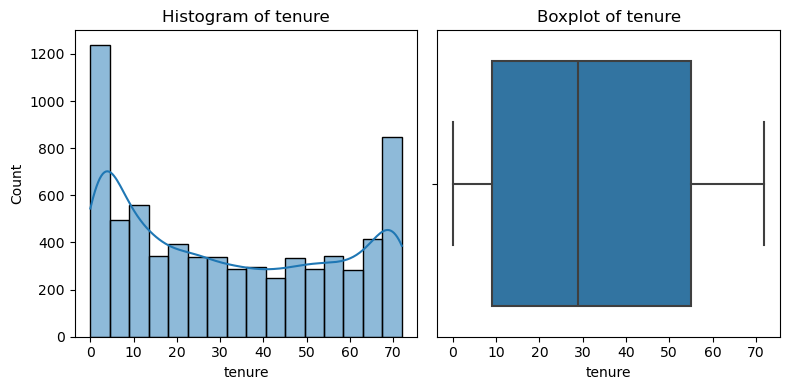

Summary statistics for MonthlyCharges:
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64




c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


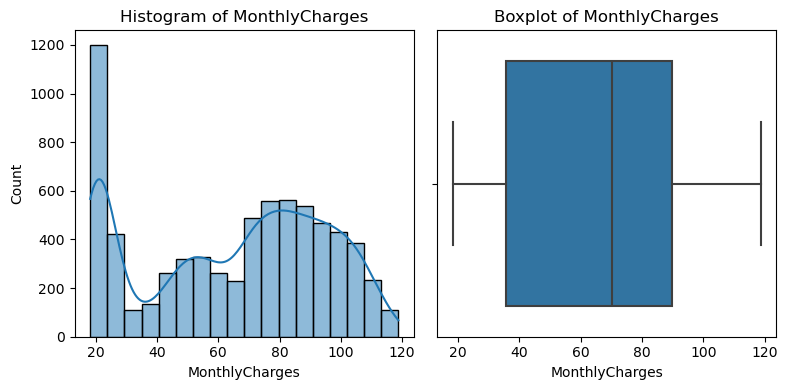

Summary statistics for TotalCharges:
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64




c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


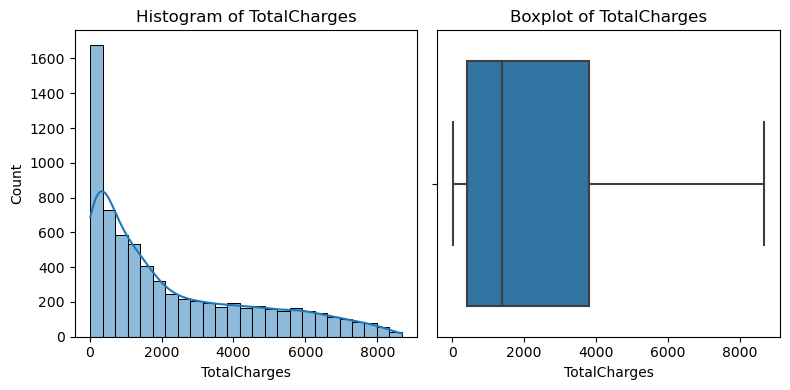

In [45]:

#Numerical summary Analysis 
#create a summary of numeric columns and visualize their relationships using a pairplot
# Define numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

def num_summary(df, col, plot=False):
    """
    Generate summary statistics and optionally plot for a numeric column in the DataFrame.
    
    Parameters:
    - df: DataFrame containing the data
    - col: Column name (string) for which to generate the summary
    - plot: Boolean indicating whether to plot the column
    """
    # Calculate summary statistics
    summary = df[col].describe()
    print(f"Summary statistics for {col}:")
    print(summary)
    print("\n")

    if plot:
        # Plot histogram and boxplot
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.show()

# Loop through numeric columns and generate summary and plots
for col in num_cols:
    num_summary(df, col, plot=True)

c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


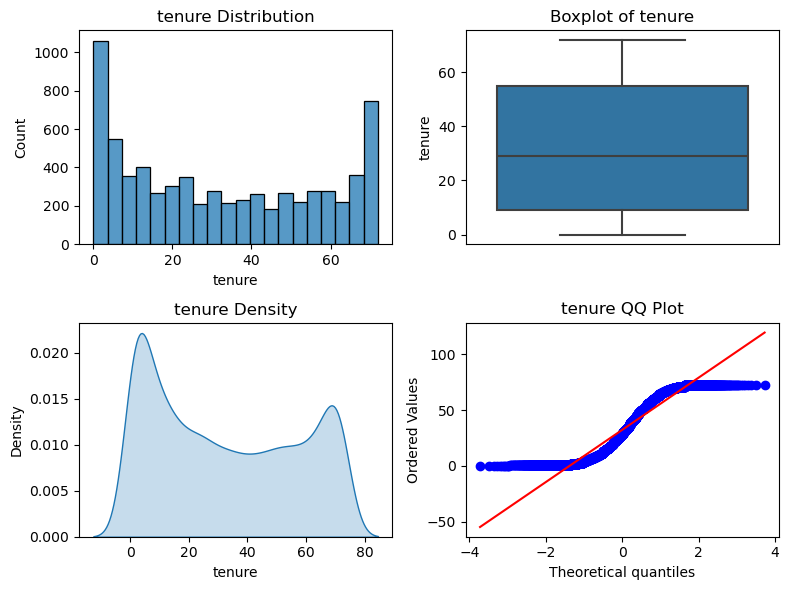

c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


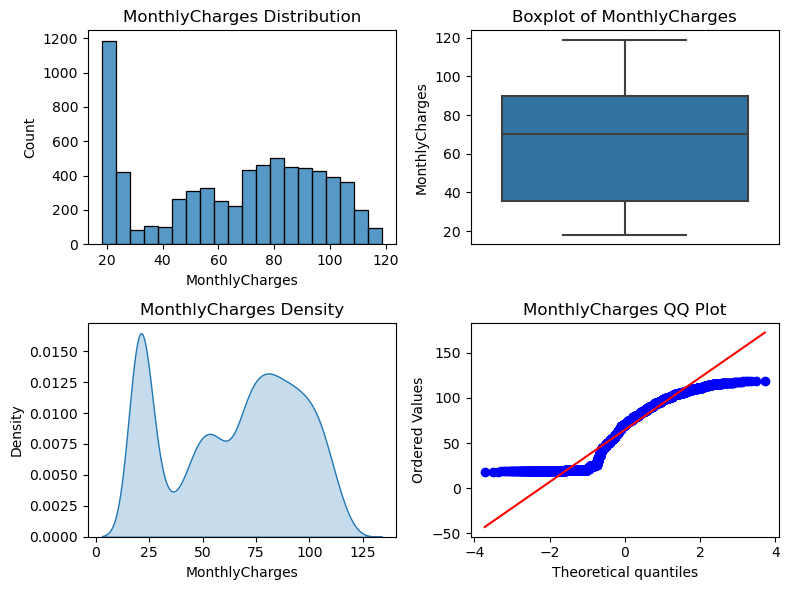

c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


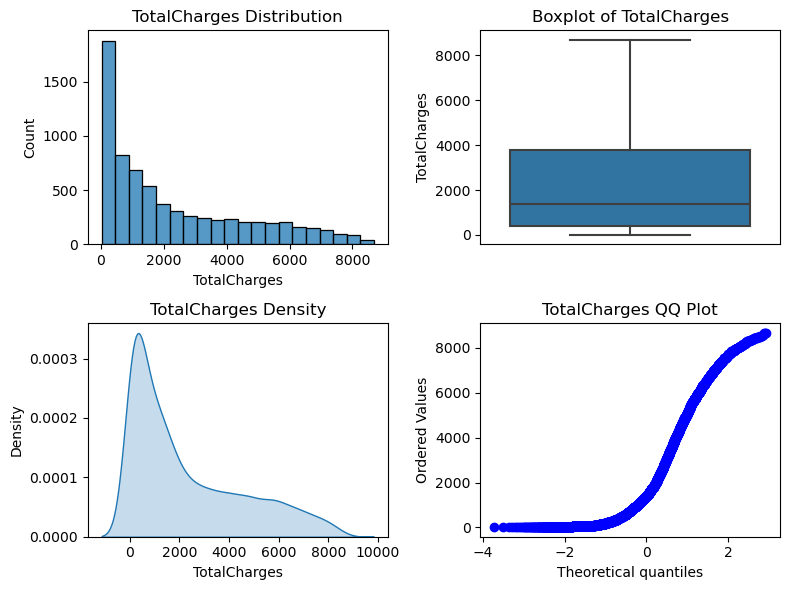

In [46]:
def num_summary(dataframe, numerical_col, plot=False, hist_bins=20):
    """
    Generate summary statistics and optionally plot for a numeric column in the DataFrame.
    
    Parameters:
    - dataframe: DataFrame containing the data
    - numerical_col: Column name (string) for which to generate the summary
    - plot: Boolean indicating whether to plot the column
    - hist_bins: Number of bins for the histogram
    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    
    
    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(8, 6))
        
        # Histogram
        sns.histplot(dataframe[numerical_col], bins=hist_bins, kde=False, ax=axs[0, 0])
        axs[0, 0].set_xlabel(numerical_col)
        axs[0, 0].set_title(f'{numerical_col} Distribution')
        
        # Boxplot
        sns.boxplot(y=dataframe[numerical_col], ax=axs[0, 1])
        axs[0, 1].set_title(f'Boxplot of {numerical_col}')
        axs[0, 1].set_xticks([])  # Remove x-ticks for better visualization
        
        # Density Plot
        sns.kdeplot(dataframe[numerical_col], fill=True, ax=axs[1, 0])
        axs[1, 0].set_xlabel(numerical_col)
        axs[1, 0].set_title(f'{numerical_col} Density')
        
        # QQ Plot
        stats.probplot(dataframe[numerical_col], dist="norm", plot=axs[1, 1])
        axs[1, 1].set_title(f'{numerical_col} QQ Plot')
        
        plt.tight_layout()
        plt.show()

# Example usage
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    num_summary(df, col, plot=True)


c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\BRYEMM004\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


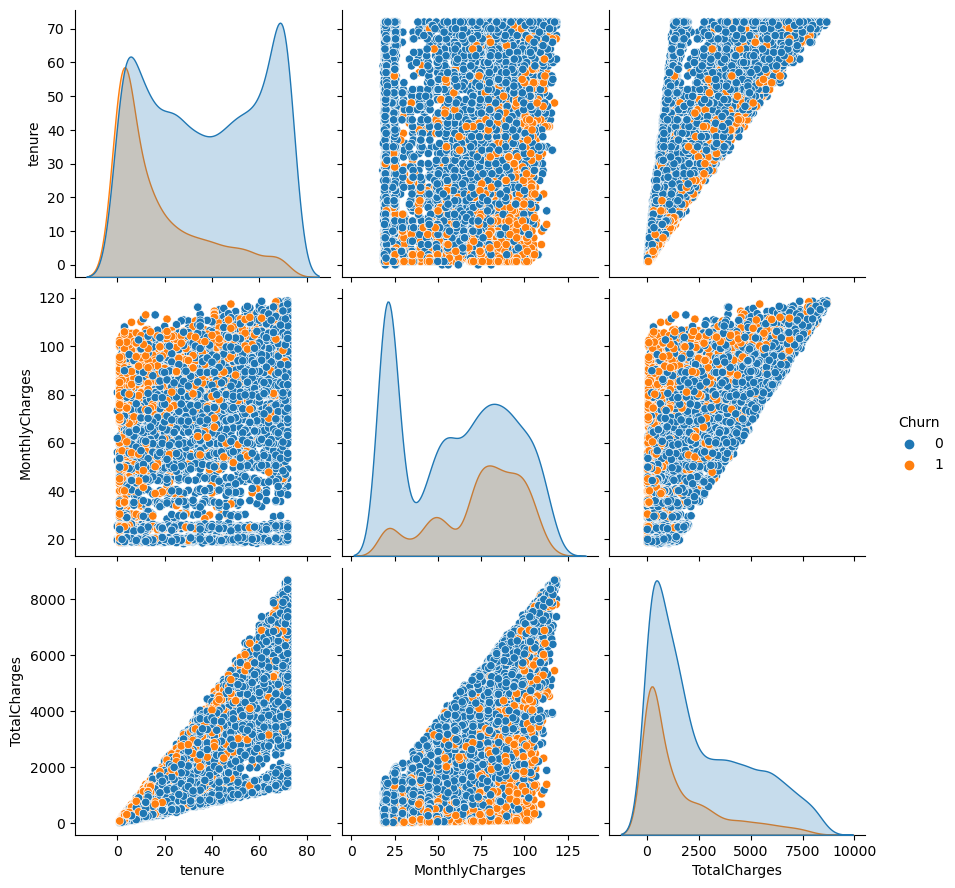

In [47]:
# We can futher use sns.pairplot to create a matrix of scatter plots for all pairwise combinations of the specified numeric columns
#  From this we can observe that those with higher monthly payments and new customers are more likely to churn. 
sns.pairplot(data=df, vars=num_cols, hue="Churn", height=3)

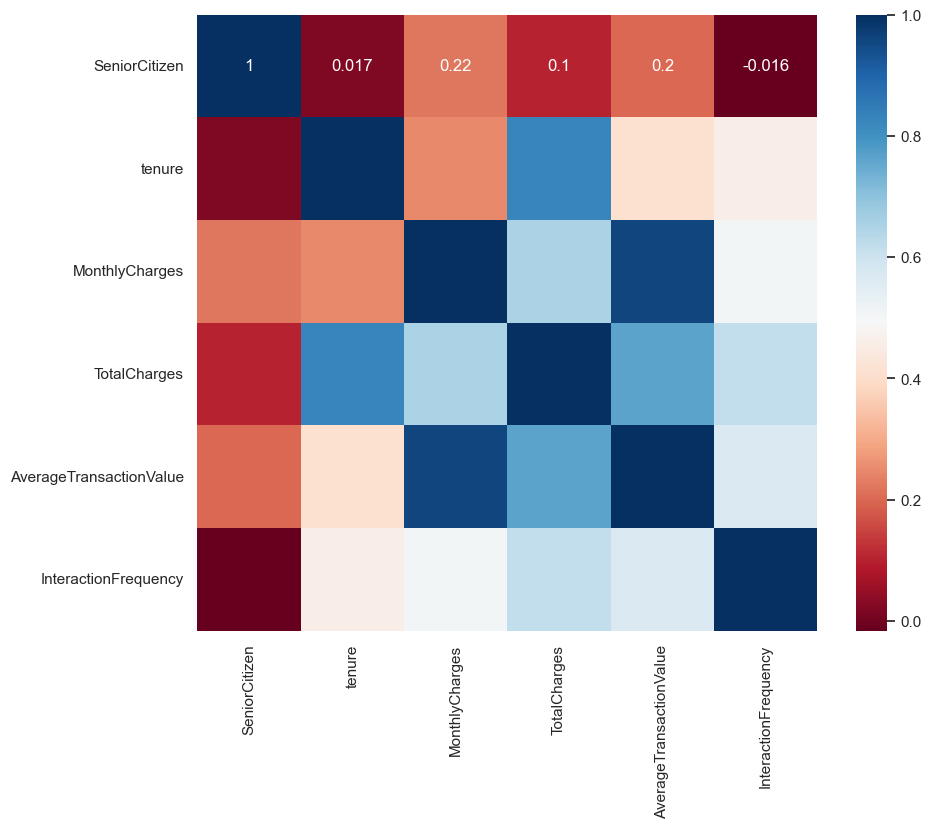

['AverageTransactionValue']

In [48]:
# Correlation Analysis
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr(numeric_only=True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set_theme(rc={"figure.figsize": (10, 8)})
        sns.heatmap(corr, annot=True, cmap="RdBu")
        plt.show()
    return drop_list
high_correlated_cols(df, plot=True)

## ML Model Development:
* Split the data into training and testing sets.
* Develop and compare different machine learning models, such as Logistic Regression, Random Forest, Gradient Boosting Machines, and Neural Networks, to predict churn.
* Evaluate models using metrics like accuracy, precision, recall, F1-score, and Area Under the Curve (AUC) to choose the best-performing model.

Import Libraries 

In [49]:
import scipy.stats as stats
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders import TargetEncoder, BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient boosting model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


Data Preparation 

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageTransactionValue,InteractionFrequency,TenureGroup
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,14.925000,0,0-1Y
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,53.985714,2,2-3Y
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,36.050000,1,0-1Y
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.016304,3,3-4Y
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,50.550000,0,0-1Y


In [51]:

# Check for missing values in X_train
df = df.dropna()


In [52]:
# The CustomerID variable doesnt hold any significance in the model development, I will therefore drop it from the dataset.
df.drop("customerID", axis = 1, inplace = True)

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageTransactionValue,InteractionFrequency,TenureGroup
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,14.925000,0,0-1Y
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,0,53.985714,2,2-3Y
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,36.050000,1,0-1Y
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,40.016304,3,3-4Y
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,50.550000,0,0-1Y


Identify the features and the target variables 

In [54]:
# Define categorical and numerical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGroup']
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'AverageTransactionValue', 'InteractionFrequency']


df1=df.copy()
def one_hot_encoder(dataframe, categorical_features, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_features, dtype=int, drop_first=drop_first)
    return dataframe

df1 = one_hot_encoder(df1, categorical_features, drop_first=True)
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,AverageTransactionValue,InteractionFrequency,gender_Male,Partner_Yes,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2Y,TenureGroup_2-3Y,TenureGroup_3-4Y,TenureGroup_4-5Y,TenureGroup_5-6Y,TenureGroup_6-7Y,TenureGroup_7-8Y,TenureGroup_8-10Y
0,0,1,29.85,29.85,0,14.925000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,0,53.985714,2,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2,53.85,108.15,1,36.050000,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,0,40.016304,3,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,50.550000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [55]:
df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,AverageTransactionValue,InteractionFrequency,gender_Male,Partner_Yes,Dependents_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-2Y,TenureGroup_2-3Y,TenureGroup_3-4Y,TenureGroup_4-5Y,TenureGroup_5-6Y,TenureGroup_6-7Y,TenureGroup_7-8Y,TenureGroup_8-10Y
0,0,1,29.85,29.85,0,14.925000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.50,0,53.985714,2,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2,53.85,108.15,1,36.050000,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,45,42.30,1840.75,0,40.016304,3,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,50.550000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,79.620000,3,1,1,1,...,0,1,0,1,0,0,0,0,0,0
7039,0,72,103.20,7362.90,0,100.861644,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
7040,0,11,29.60,346.45,0,28.870833,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,61.320000,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
# Drop the target variable 'churn' to create the feature matrix X
X = df1.drop(['Churn'], axis=1)

# Extract the target variable 'churn' for supervised learning
y = df1['Churn']


Splitting the Dataset

In [57]:
from sklearn.model_selection import train_test_split  # Splitting the dataset

# Initial Split: You split the data into training (70%) and test (20%) sets.
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)




In [58]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
    ])

In [62]:
# Convert target labels to integers
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Dictionary of machine learning models for multi-class classification
models = {
    'LogisticRegression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
    'LGBMClassifier': LGBMClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Dictionary to store performance metrics for each model
model_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    val_preds = model.predict(X_val)
    
    # Get probability estimates for each class required for AUC calculation
    if hasattr(model, "predict_proba"):
        val_probs = model.predict_proba(X_val)
    else:
        print(f"{name} does not support `predict_proba`. Skipping AUC calculation.")
        val_probs = np.zeros((X_val.shape[0], len(np.unique(y_train))))  # Dummy probabilities
    
    # Calculate accuracy for the validation set
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Calculate the AUC score using the One-vs-Rest scheme for multi-class scenarios
    try:
        if len(val_probs.shape) == 2 and val_probs.shape[1] > 1:
            val_roc_auc = roc_auc_score(y_val, val_probs, multi_class='ovr', average='weighted')
        else:
            val_roc_auc = float('nan')
    except ValueError as e:
        print(f"Error calculating ROC AUC for {name}: {e}")
        val_roc_auc = float('nan')
    
    # Store accuracy and AUC in the metrics dictionary
    model_metrics[name] = {
        'Accuracy': val_accuracy,
        'ROC AUC': val_roc_auc
    }
    
    # Output a classification report for each model
    print(f"{name} Classification Report:")
    print(classification_report(y_val, val_preds))
    
# Convert the metrics dictionary to a DataFrame for easy viewing
metrics_df = pd.DataFrame(model_metrics).T

# Print the DataFrame containing accuracy and AUC for each model
print(metrics_df)


Training LogisticRegression...
Error calculating ROC AUC for LogisticRegression: y should be a 1d array, got an array of shape (1407, 2) instead.
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Training DecisionTree...
Error calculating ROC AUC for DecisionTree: y should be a 1d array, got an array of shape (1407, 2) instead.
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.53      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75

Training LogisticRegression...
Shape of y_val: (1407,)
Shape of val_probs: (1407, 2)
Error calculating ROC AUC for LogisticRegression: y should be a 1d array, got an array of shape (1407, 2) instead.
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Training DecisionTree...
Shape of y_val: (1407,)
Shape of val_probs: (1407, 2)
Error calculating ROC AUC for DecisionTree: y should be a 1d array, got an array of shape (1407, 2) instead.
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1033
           1       0.53      0.54      0.54       374

    accuracy                           0.75

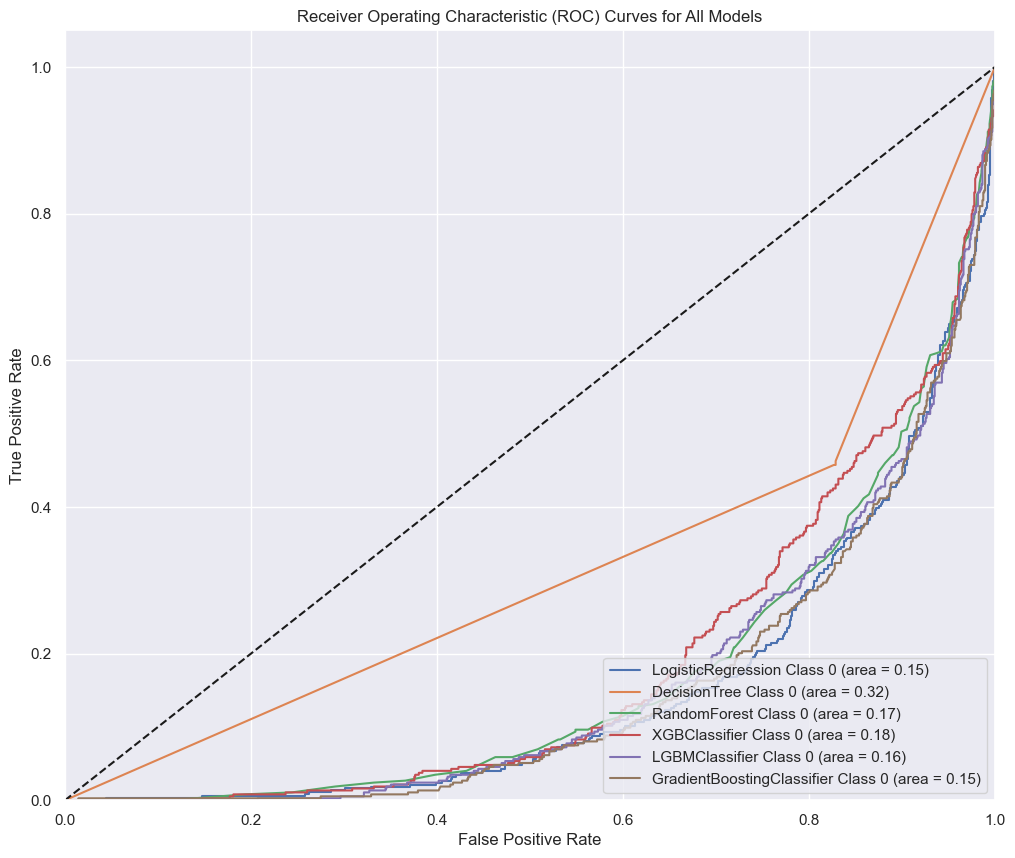

                            Accuracy  ROC AUC
LogisticRegression          0.800284      NaN
DecisionTree                0.751955      NaN
RandomForest                0.795309      NaN
XGBClassifier               0.783937      NaN
LGBMClassifier              0.802416      NaN
GradientBoostingClassifier  0.805259      NaN


In [64]:
# Dictionary of machine learning models
models = {
    'LogisticRegression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
    'LGBMClassifier': LGBMClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Dictionary to store performance metrics
model_metrics = {}

# Plot ROC curves for all models in one figure
plt.figure(figsize=(12, 10))

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    val_preds = model.predict(X_val)
    
    # Get probability estimates for each class required for AUC calculation
    if hasattr(model, "predict_proba"):
        val_probs = model.predict_proba(X_val)
    else:
        print(f"{name} does not support `predict_proba`. Skipping AUC calculation.")
        val_probs = np.zeros((X_val.shape[0], len(np.unique(y_train))))  # Dummy probabilities
    
    # Check shapes
    print("Shape of y_val:", y_val.shape)
    print("Shape of val_probs:", val_probs.shape)
    
    # Flatten y_val to ensure it's 1D
    if y_val.ndim == 2:
        y_val = y_val.ravel()
    
    # Calculate accuracy for the validation set
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Binarize the true labels for multi-class ROC
    y_bin = label_binarize(y_val, classes=np.unique(y_train))
    
    # Calculate the ROC curve and AUC for each class
    n_classes = y_bin.shape[1]
    
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], val_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} Class {i} (area = {roc_auc:.2f})')
    
    # Calculate the AUC score using the One-vs-Rest scheme for multi-class scenarios
    try:
        if len(val_probs.shape) == 2 and val_probs.shape[1] > 1:
            val_roc_auc = roc_auc_score(y_bin, val_probs, multi_class='ovr', average='weighted')
        else:
            val_roc_auc = float('nan')
    except ValueError as e:
        print(f"Error calculating ROC AUC for {name}: {e}")
        val_roc_auc = float('nan')
    
    # Store accuracy and AUC in the metrics dictionary
    model_metrics[name] = {
        'Accuracy': val_accuracy,
        'ROC AUC': val_roc_auc
    }
    
    # Output a classification report for each model
    print(f"{name} Classification Report:")
    print(classification_report(y_val, val_preds))

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for All Models')
plt.legend(loc='lower right')
plt.show()

# Convert the metrics dictionary to a DataFrame for easy viewing
metrics_df = pd.DataFrame(model_metrics).T

# Print the DataFrame containing accuracy and AUC for each model
print(metrics_df)

Use techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) to interpret the model’s predictions.

Training LogisticRegression...
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



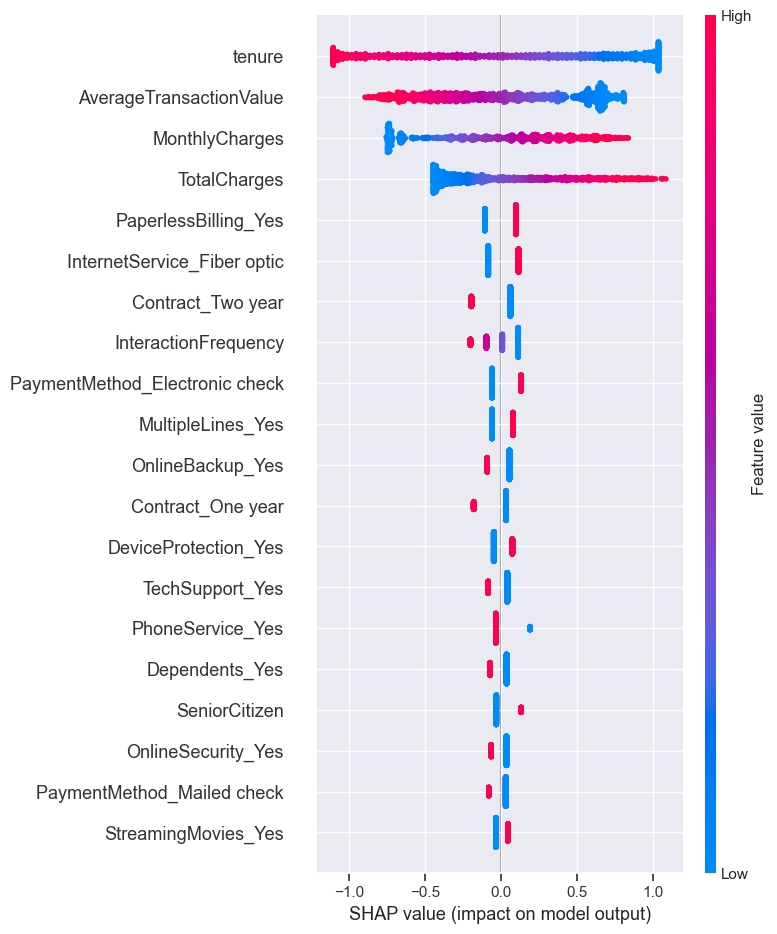

Training DecisionTree...
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1033
           1       0.50      0.52      0.51       374

    accuracy                           0.74      1407
   macro avg       0.66      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



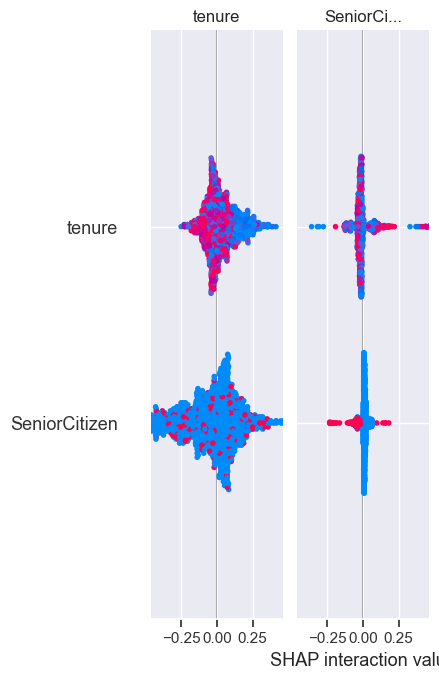

Training RandomForest...
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



 99%|===================| 2786/2814 [01:13<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.209900, while the model output was 0.280000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [76]:
import shap

# Convert target labels to integers
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Dictionary of machine learning models for multi-class classification
models = {
    'LogisticRegression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
    'LGBMClassifier': LGBMClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Dictionary to store performance metrics for each model
model_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    val_preds = model.predict(X_val)
    
    # Get probability estimates for each class required for AUC calculation
    if hasattr(model, "predict_proba"):
        val_probs = model.predict_proba(X_val)[:, 1]  # Use probabilities for the positive class only
    else:
        print(f"{name} does not support `predict_proba`. Skipping AUC calculation.")
        val_probs = np.zeros(X_val.shape[0])  # Dummy probabilities
    
    # Calculate accuracy for the validation set
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Calculate the AUC score for binary classification
    try:
        val_roc_auc = roc_auc_score(y_val, val_probs)
    except ValueError as e:
        print(f"Error calculating ROC AUC for {name}: {e}")
        val_roc_auc = float('nan')
    
    # Store accuracy and AUC in the metrics dictionary
    model_metrics[name] = {
        'Accuracy': val_accuracy,
        'ROC AUC': val_roc_auc
    }
    
    # Output a classification report for each model
    print(f"{name} Classification Report:")
    print(classification_report(y_val, val_preds))
    
    # SHAP explanation
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_val)
    
    # Ensure feature names are correctly passed
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
    
    # Plot SHAP summary
    shap.summary_plot(shap_values, X_val, feature_names=feature_names)

# Convert the metrics dictionary to a DataFrame for easy viewing
metrics_df = pd.DataFrame(model_metrics).T

# Print the DataFrame containing accuracy and AUC for each model
print(metrics_df)


Training LogisticRegression...
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Error with SHAP explanation for LogisticRegression: LinearExplainer.shap_values() got an unexpected keyword argument 'check_additivity'
Training DecisionTree...
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407

Error with SHAP explanation for DecisionTree: An unknown model type was pass

100%|===================| 2805/2814 [01:13<00:00]        

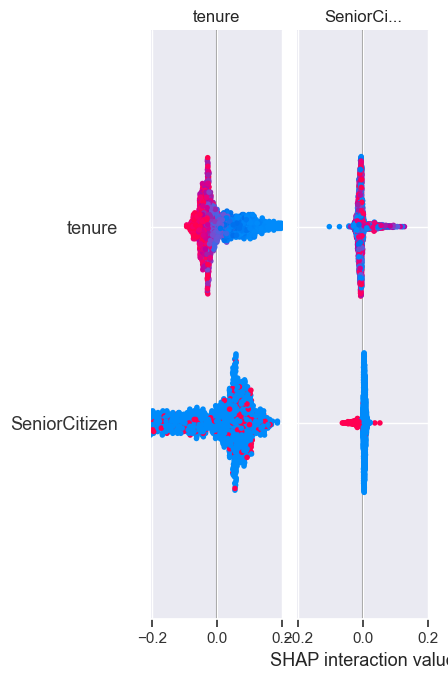

Training XGBClassifier...
XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



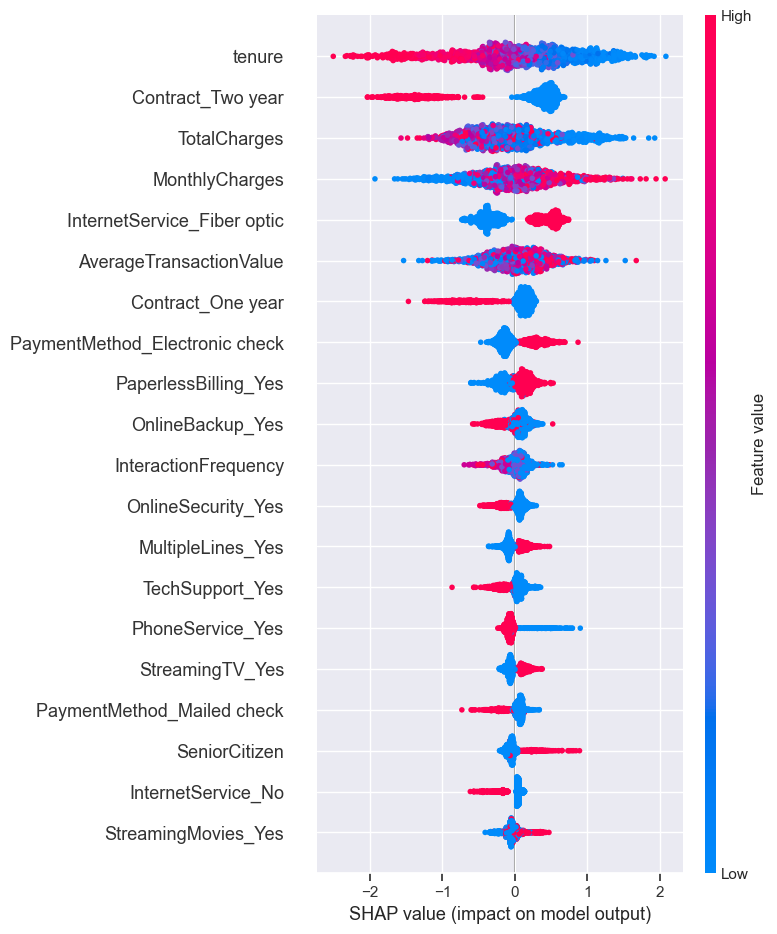

Training LGBMClassifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
LGBMClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



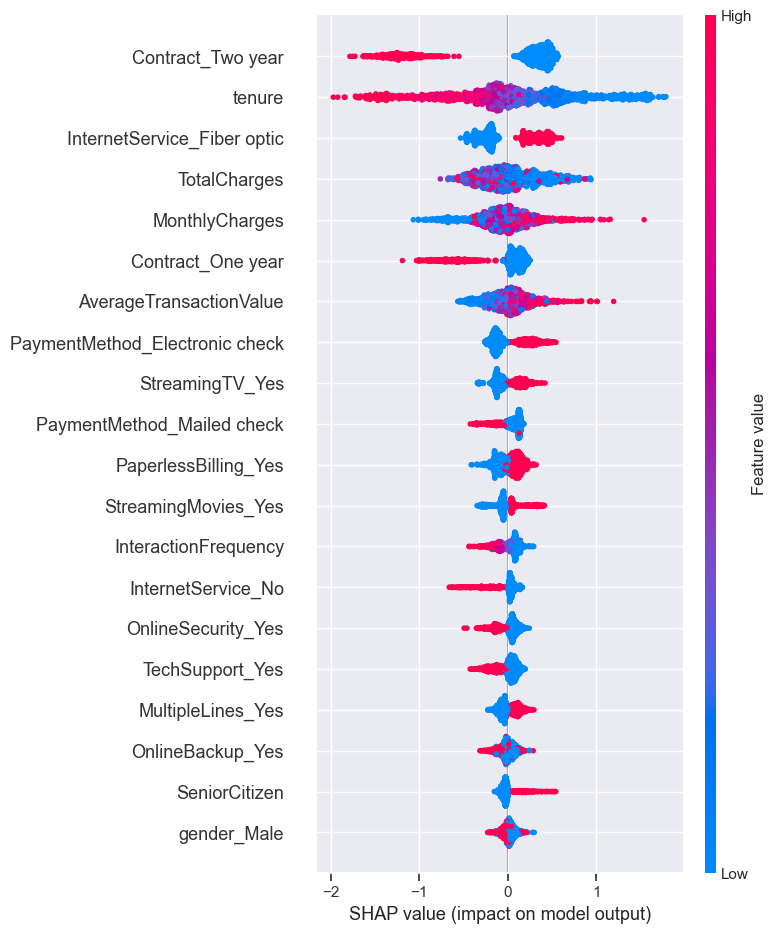

Training GradientBoostingClassifier...
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.67      0.54      0.59       374

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407

Error with SHAP explanation for GradientBoostingClassifier: An unknown model type was passed: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
                            Accuracy   ROC AUC
LogisticRegression          0.800284  0.850529
DecisionTree                0.735608  0.663390
RandomForest                0.791756  0.828806
XGBClassifier               0.783937  0.821112
LGBMClassifier              0.802416  0.841006
GradientBoostingClassifier  0.805259  0.851114


In [77]:
import shap

# Convert target labels to integers
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Dictionary of machine learning models for multi-class classification
models = {
    'LogisticRegression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(eval_metric='mlogloss'),
    'LGBMClassifier': LGBMClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier()
}

# Dictionary to store performance metrics for each model
model_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Train the model using the training data
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    val_preds = model.predict(X_val)
    
    # Get probability estimates for each class required for AUC calculation
    if hasattr(model, "predict_proba"):
        val_probs = model.predict_proba(X_val)[:, 1]  # Use probabilities for the positive class only
    else:
        print(f"{name} does not support `predict_proba`. Skipping AUC calculation.")
        val_probs = np.zeros(X_val.shape[0])  # Dummy probabilities
    
    # Calculate accuracy for the validation set
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Calculate the AUC score for binary classification
    try:
        val_roc_auc = roc_auc_score(y_val, val_probs)
    except ValueError as e:
        print(f"Error calculating ROC AUC for {name}: {e}")
        val_roc_auc = float('nan')
    
    # Store accuracy and AUC in the metrics dictionary
    model_metrics[name] = {
        'Accuracy': val_accuracy,
        'ROC AUC': val_roc_auc
    }
    
    # Output a classification report for each model
    print(f"{name} Classification Report:")
    print(classification_report(y_val, val_preds))
    
    # SHAP explanation
    try:
        if hasattr(model, 'predict_proba'):
            if isinstance(model, (RandomForestClassifier, XGBClassifier, LGBMClassifier)):
                explainer = shap.TreeExplainer(model, X_train)
            else:
                explainer = shap.LinearExplainer(model, X_train)
        else:
            explainer = shap.KernelExplainer(model.predict_proba, X_train)
        
        shap_values = explainer.shap_values(X_val, check_additivity=False)
        
        # Ensure feature names are correctly passed
        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
        
        # Plot SHAP summary
        shap.summary_plot(shap_values, X_val, feature_names=feature_names)
    
    except Exception as e:
        print(f"Error with SHAP explanation for {name}: {e}")

# Convert the metrics dictionary to a DataFrame for easy viewing
metrics_df = pd.DataFrame(model_metrics).T

# Print the DataFrame containing accuracy and AUC for each model
print(metrics_df)


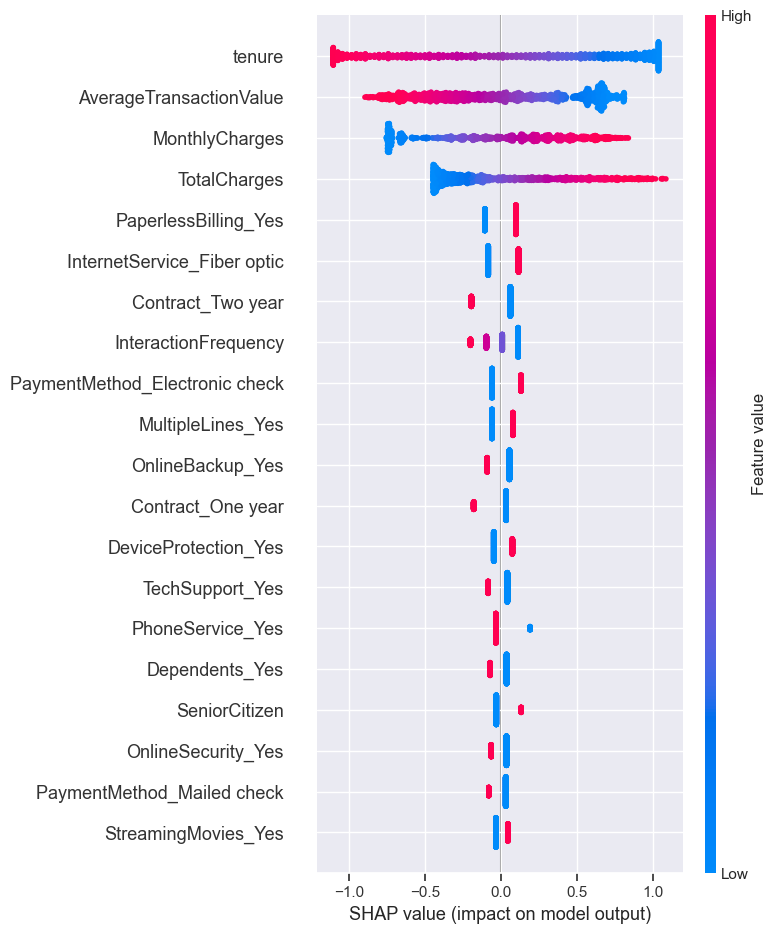

In [75]:
import shap

# Choose the appropriate explainer for your model
if isinstance(model, (LogisticRegression, GradientBoostingClassifier)):
    explainer = shap.LinearExplainer(model, X_train)
elif hasattr(model, 'predict_proba'):
    explainer = shap.TreeExplainer(model)
else:
    raise ValueError("Model type not supported for SHAP")

# Compute SHAP values
shap_values = explainer.shap_values(X_val)

# If you need to visualize the SHAP values
shap.summary_plot(shap_values, X_val, feature_names=feature_names)



Using LIME

Evaluating LogisticRegression...
Error calculating ROC AUC for LogisticRegression: y should be a 1d array, got an array of shape (1407, 2) instead.
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



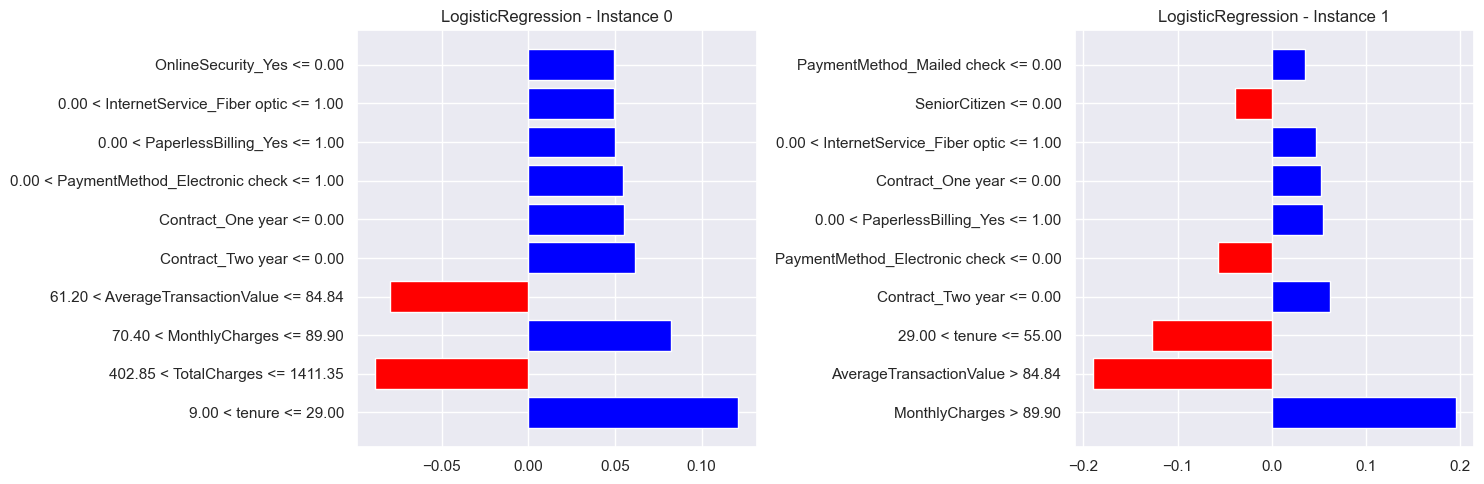

Evaluating DecisionTree...
Error calculating ROC AUC for DecisionTree: y should be a 1d array, got an array of shape (1407, 2) instead.
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.74      0.74      1407



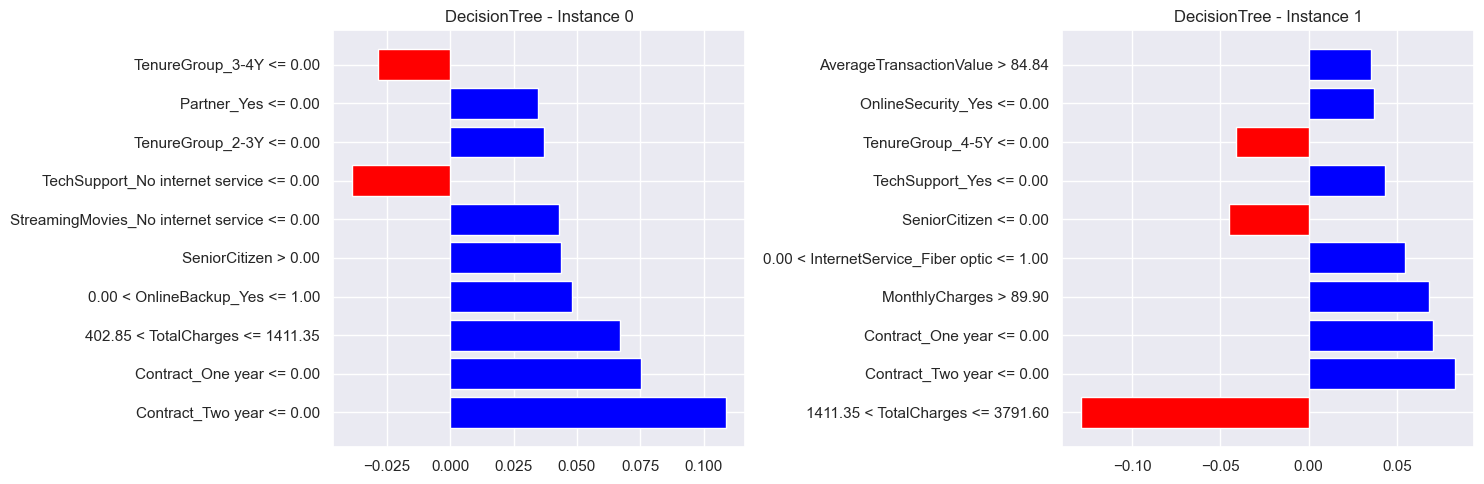

Evaluating RandomForest...
Error calculating ROC AUC for RandomForest: y should be a 1d array, got an array of shape (1407, 2) instead.
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



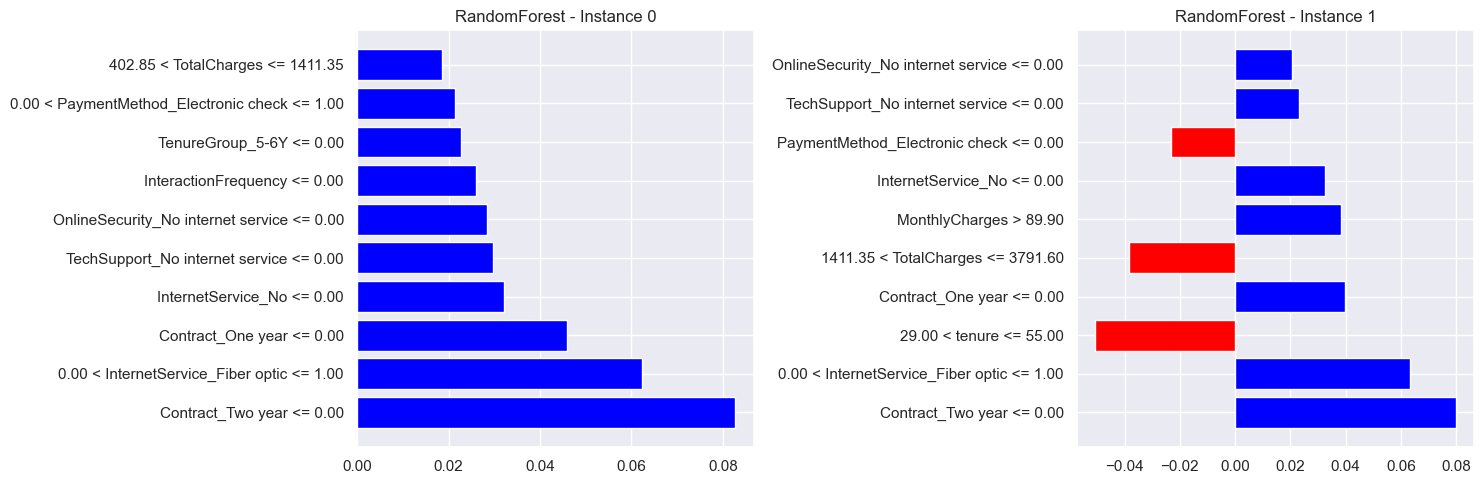

Evaluating XGBClassifier...
Error calculating ROC AUC for XGBClassifier: y should be a 1d array, got an array of shape (1407, 2) instead.
XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



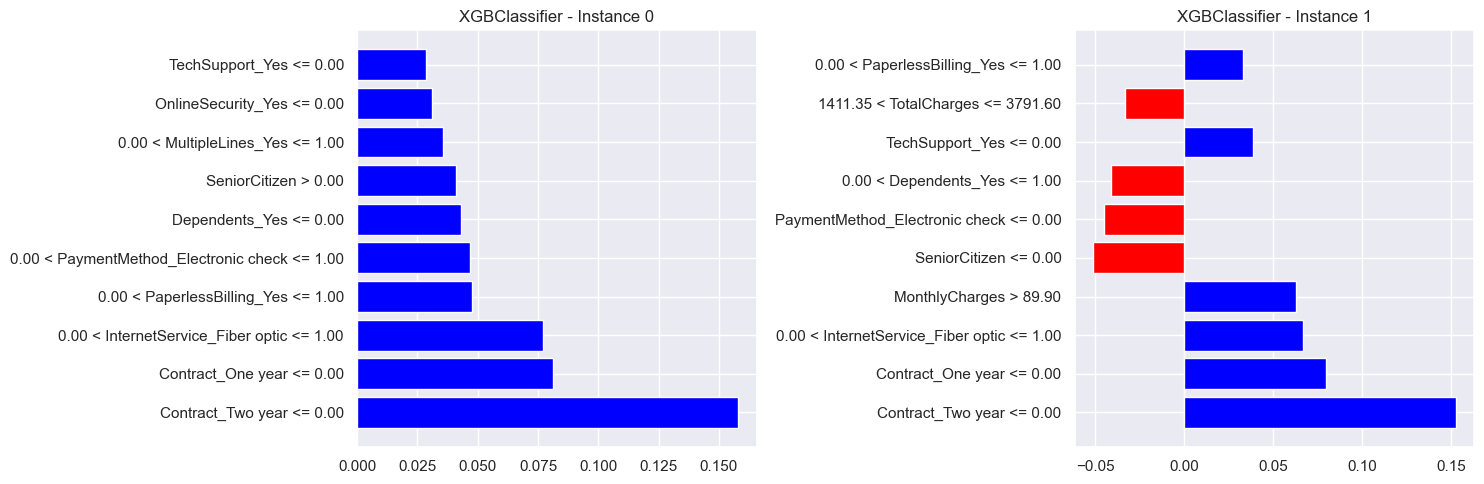

Evaluating LGBMClassifier...
Error calculating ROC AUC for LGBMClassifier: y should be a 1d array, got an array of shape (1407, 2) instead.
LGBMClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



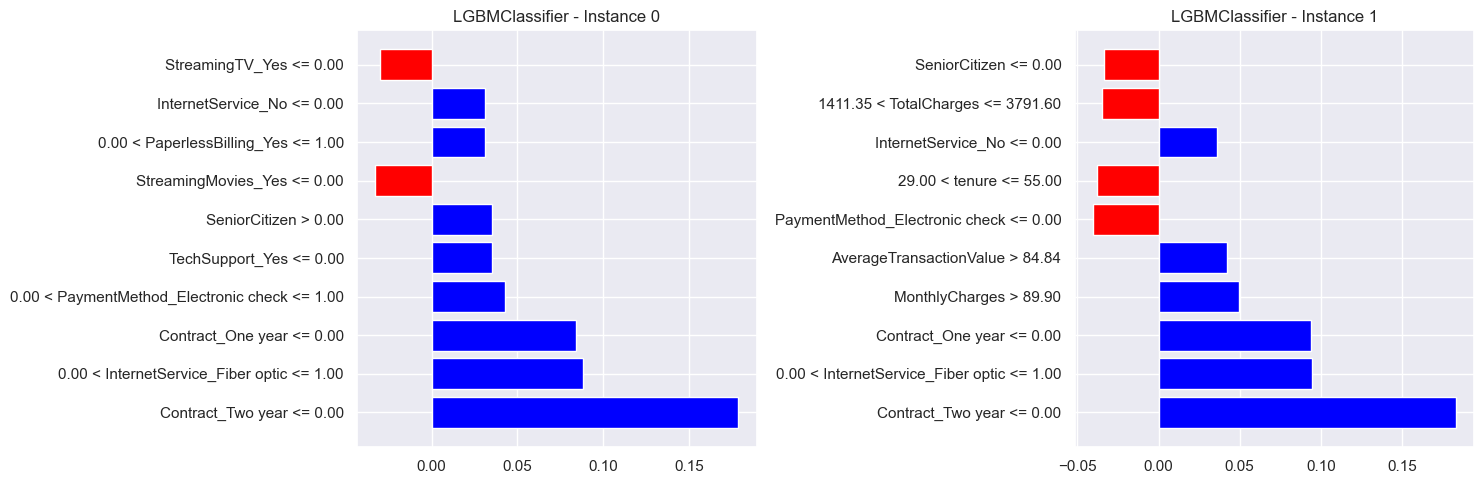

Evaluating GradientBoostingClassifier...
Error calculating ROC AUC for GradientBoostingClassifier: y should be a 1d array, got an array of shape (1407, 2) instead.
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.67      0.54      0.59       374

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



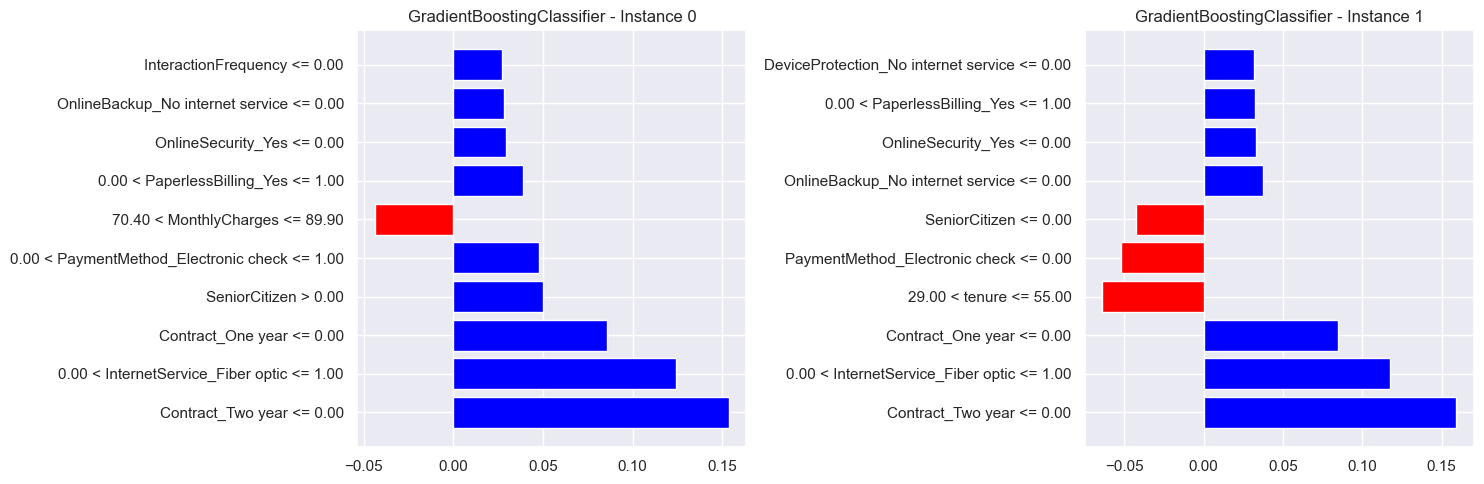

                            Accuracy  ROC AUC
LogisticRegression          0.800284      NaN
DecisionTree                0.735608      NaN
RandomForest                0.791756      NaN
XGBClassifier               0.783937      NaN
LGBMClassifier              0.802416      NaN
GradientBoostingClassifier  0.805259      NaN


In [80]:
import lime
import lime.lime_tabular

# Dictionary to store performance metrics
model_metrics = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Predict on the validation set
    val_preds = model.predict(X_val)
    
    # Get probability estimates for each class required for AUC calculation
    if hasattr(model, "predict_proba"):
        val_probs = model.predict_proba(X_val)
    else:
        print(f"{name} does not support `predict_proba`. Skipping AUC calculation.")
        val_probs = np.zeros((X_val.shape[0], len(np.unique(y_val))))  # Dummy probabilities
    
    # Calculate accuracy for the validation set
    val_accuracy = accuracy_score(y_val, val_preds)
    
    # Binarize the true labels for multi-class ROC
    y_bin = label_binarize(y_val, classes=np.unique(y_val))
    
    # Calculate the ROC AUC score
    try:
        if len(val_probs.shape) == 2 and val_probs.shape[1] > 1:
            val_roc_auc = roc_auc_score(y_bin, val_probs, multi_class='ovr', average='weighted')
        else:
            val_roc_auc = float('nan')
    except ValueError as e:
        print(f"Error calculating ROC AUC for {name}: {e}")
        val_roc_auc = float('nan')
    
    # Store accuracy and AUC in the metrics dictionary
    model_metrics[name] = {
        'Accuracy': val_accuracy,
        'ROC AUC': val_roc_auc
    }
    
    # Output a classification report for each model
    print(f"{name} Classification Report:")
    print(classification_report(y_val, val_preds))
    
    # LIME explanation
    if hasattr(model, 'predict_proba'):
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=np.array(X_train),
            feature_names=X_train.columns,
            class_names=np.unique(y_train),
            mode='classification'
        )
        
        # Create a figure with subplots
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Explain two predictions
        for i, ax in enumerate(axes):
            exp = explainer.explain_instance(
                data_row=X_val.iloc[i],
                predict_fn=model.predict_proba,
                num_features=10
            )
            
            # Extract the explanation data
            exp_list = exp.as_list()
            feature_names, feature_values = zip(*exp_list)
            feature_values = np.array(feature_values)
            
            # Plot the explanation manually
            colors = ['blue' if val > 0 else 'red' for val in feature_values]
            ax.barh(feature_names, feature_values, color=colors)
            ax.set_title(f'{name} - Instance {i}')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"{name} does not support LIME explanations.")
    
# Convert the metrics dictionary to a DataFrame for easy viewing
metrics_df = pd.DataFrame(model_metrics).T

# Print the DataFrame containing accuracy and AUC for each model
print(metrics_df)

Deployment and Monitoring:
* Build a system that flags customers at high risk of churning in real-time, allowing the business to take proactive measures.
* Use tools like Flask or FastAPI to create an API that integrates with a CRM system or marketing platform for automated retention actions.
* Monitor the performance of the churn model over time and update it as customer behavior evolves.

In [82]:
#pip install flask

 Implementation Steps
* We shart by Creating the API Server using Flask

In [83]:
import os
print(os.getcwd())

c:\Users\BRYEMM004\Desktop\Data_career_boot_camp\Capstone_project


Overview of app.py
The Flask application provides a REST API endpoint that allows users to submit data and get predictions from a pre-trained machine learning model. Specifically, this API endpoint predicts the probability of customer churn and indicates whether a customer is considered high risk for churn.

In [91]:
from flask import Flask, request, jsonify
import joblib
from flask_cors import CORS
import logging

app = Flask(__name__)
CORS(app)  # Enable CORS

# Configure logging
logging.basicConfig(level=logging.INFO)

# Load the pre-trained churn model
model_path = 'C:/Users/BRYEMM004/Desktop/Data_career_boot_camp/Capstone_project/churn_model.pkl'
model = joblib.load(model_path)

@app.route('/predict_churn/', methods=['POST'])
def predict_churn():
    try:
        # Get JSON data from request
        data = request.get_json()

        # Check if 'features' key exists
        if 'features' not in data:
            return jsonify({"error": "Missing 'features' key in request data"}), 400

        # Convert features to numpy array and reshape for model prediction
        features = np.array(data['features']).reshape(1, -1)

        # Check if features array is empty or incorrect shape
        if features.size == 0 or len(features.shape) != 2:
            return jsonify({"error": "Invalid features data"}), 400

        # Make prediction
        churn_prob = model.predict_proba(features)[0, 1]

        # Define threshold for high-risk classification
        threshold = 0.5
        is_high_risk = churn_prob >= threshold

        # Log the prediction
        logging.info(f"Prediction made: {churn_prob}, High risk: {is_high_risk}")

        # Return results as JSON
        return jsonify({"churn_probability": churn_prob, "is_high_risk": is_high_risk})
    
    except ValueError as ve:
        logging.error(f"ValueError: {ve}")
        return jsonify({"error": "Invalid input data"}), 400
    except Exception as e:
        logging.error(f"Exception: {e}")
        return jsonify({"error": str(e)}), 500

if __name__ == "__main__":
    app.run(host='0.0.0.0', port=8000)




FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/BRYEMM004/Desktop/Data_career_boot_camp/Capstone_project/churn_model.pkl'

Deployment

We shall Use Docker to containerize  Flask application deployment.

In [ ]:
Flask==2.2.0
joblib==1.2.0
numpy==1.23.0


Create a Dockerfile
The Dockerfile defines the environment for your Flask application and how it should be run in a container.

In [ ]:
# Use the official Python image from the Docker Hub
FROM python:3.9-slim

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file into the container
COPY requirements.txt .

# Install the dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Copy the rest of the application code into the container
COPY . .

# Expose port 8000 for the Flask app
EXPOSE 8000

# Define the command to run the application
CMD ["flask", "run", "--host=0.0.0.0", "--port=8000"]


Create a .dockerignore File
This file tells Docker which files and directories to ignore when building the image.

.dockerignore:

In [ ]:
__pycache__
*.pyc
*.pyo
*.pyd
*.git


In [ ]:
#Build and Run the Docker Image
docker build -t flask-churn-model .
#Run the Docker Container:
docker run -d -p 8000:8000 flask-churn-model
#Test the API
docker ps
#Send a Test Request:
curl -X POST http://localhost:8000/predict_churn/ \
     -H "Content-Type: application/json" \
     -d '{"features": [1, 0, 1, 0, 1]}'
